# Human Failure Representation

This paper covers the exploration and analysis of error producing conditions by a human operator in the rover model.

In [1]:
from examples.rover.rover_model_human import RoverHuman
from examples.rover.rover_model import plot_map

import fmdtools.sim.propagate as prop
import fmdtools.analyze as an
from fmdtools.sim.sample import ParameterSample, ParameterDomain, FaultSample, FaultDomain

import numpy as np
import matplotlib.pyplot as plt

Visualizing Rover Structure

In [2]:
mdl = RoverHuman()
mdl.fxns

{'power': power Power
 - PowerState(charge=100.0, power=0.0)
 - PowerMode(mode=off, faults=set()),
 'perception': perception Perception
 - PerceptionMode(mode=off, faults=set()),
 'communications': communications Communications,
 'operator': operator Operator
 - Mode(mode=nominal, faults=set()),
 'plan_path': plan_path PlanPath
 - PlanPathState(u_self=array([0., 0.]), u_lin=array([0., 0.]), u_lin_dev=array([0., 0.]), rdiff=0.0, vel_adj=1.0)
 - PlanPathMode(mode=standby, faults=set()),
 'override': override Override
 - OverrideMode(mode=off, faults=set()),
 'drive': drive Drive
 - DriveMode(mode=nominal, faults=set())}

In [3]:
#%matplotlib qt
#an.graph.set_pos(mdl, gtype='fxnflowgraph')

In [4]:
#%matplotlib inline

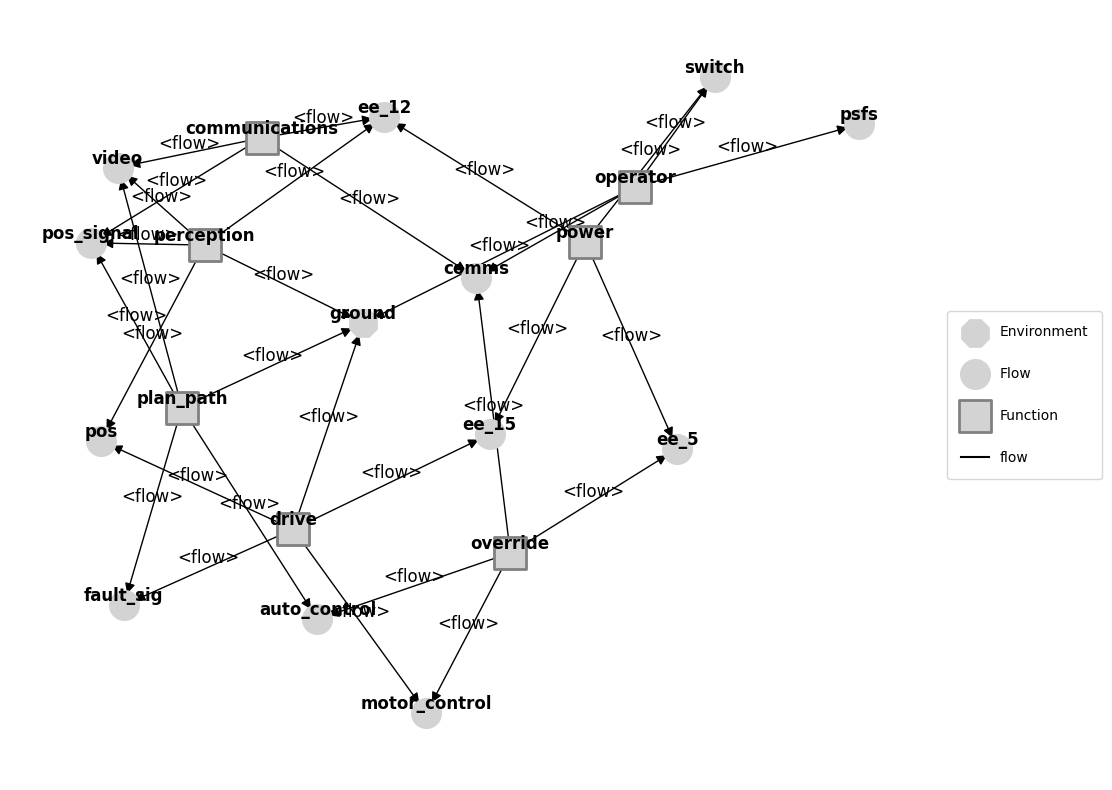

In [5]:
g = mdl.as_modelgraph()
fig, ax = g.draw()

In [6]:
fig.savefig("rover_structure.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

Visualizing Action Sequence Graph for the Controller

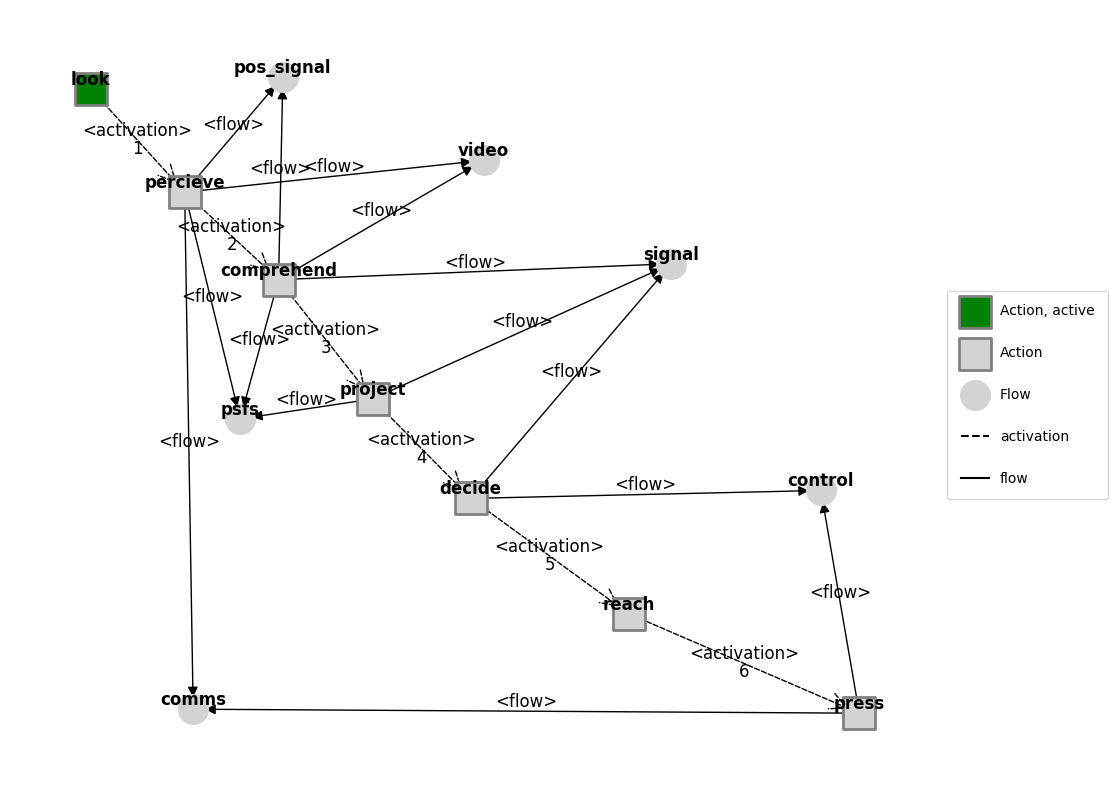

In [7]:
from examples.rover.rover_model_human import asg_pos
ag = mdl.fxns['operator'].aa.as_modelgraph()
ag.set_pos(**asg_pos)
fig, ax = ag.draw()

In [8]:
fig.savefig("action_graph.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

## Testing behavioral simulation

Execution order

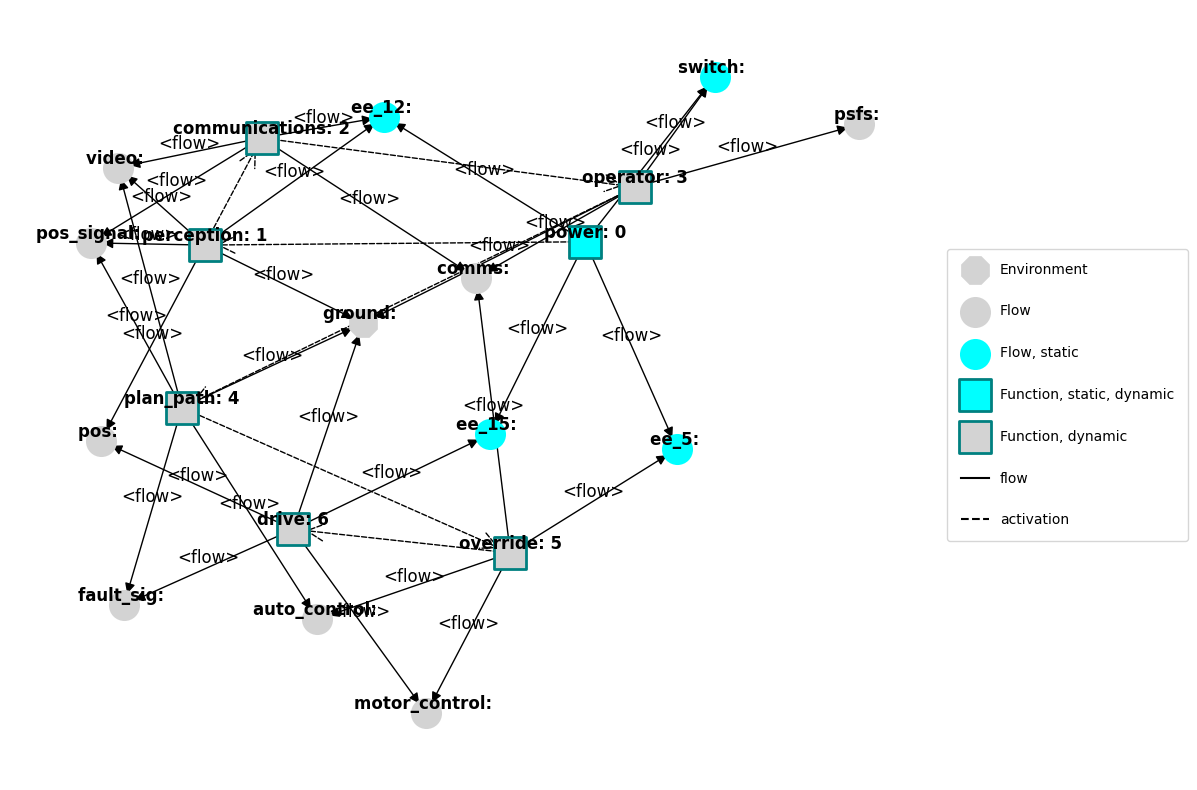

In [9]:
g.set_exec_order(mdl)
fig, ax = g.draw()

Performance on turn

(<Figure size 400x400 with 1 Axes>, <Axes: >)

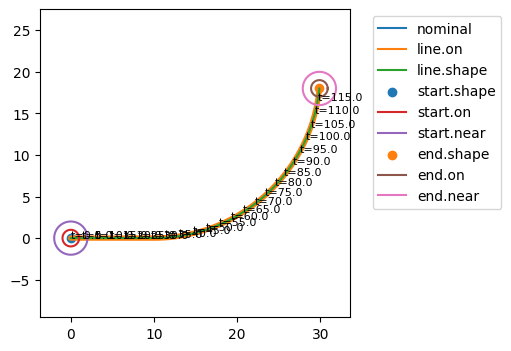

In [10]:
mdl = RoverHuman(p={'ground': 'turn'})
endresults, mdlhist = prop.nominal(mdl)
plot_map(mdl, mdlhist)

Performance on sine map

(<Figure size 400x400 with 1 Axes>, <Axes: >)

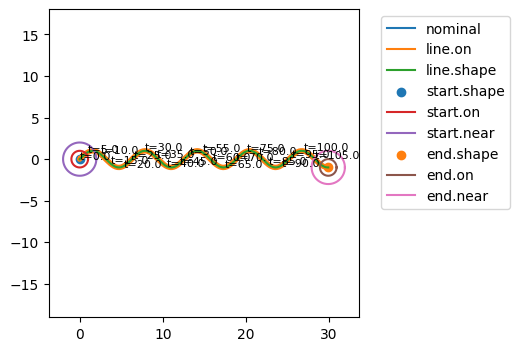

In [11]:
mdl = RoverHuman()
endresults, mdlhist = prop.nominal(mdl)
plot_map(mdl, mdlhist)

In [12]:
from fmdtools.analyze.phases import from_hist
pm = from_hist(mdlhist)

In [13]:
pm

{'power': PhaseMap({'off': [0.0, 0.0], 'supply': [1.0, 109.0]}, {'off': {'off'}, 'supply': {'supply'}}),
 'perception': PhaseMap({'off': [0.0, 1.0], 'feed': [2.0, 109.0]}, {'off': {'off'}, 'feed': {'feed'}}),
 'look': PhaseMap({'nominal': [0.0, 109.0]}, {'nominal': {'nominal'}}),
 'percieve': PhaseMap({'no_action': [0.0, 1.0], 'nominal': [2.0, 109.0]}, {'no_action': {'no_action'}, 'nominal': {'nominal'}}),
 'comprehend': PhaseMap({'nominal': [0.0, 109.0]}, {'nominal': {'nominal'}}),
 'project': PhaseMap({'nominal': [0.0, 109.0]}, {'nominal': {'nominal'}}),
 'decide': PhaseMap({'nominal': [0.0, 109.0]}, {'nominal': {'nominal'}}),
 'reach': PhaseMap({'nominal': [0.0, 109.0]}, {'nominal': {'nominal'}}),
 'plan_path': PhaseMap({'standby': [0.0, 4.0], 'drive': [5.0, 109.0]}, {'standby': {'standby'}, 'drive': {'drive'}}),
 'override': PhaseMap({'off': [0.0, 1.0], 'override': [2.0, 109.0]}, {'off': {'off'}, 'override': {'override'}})}

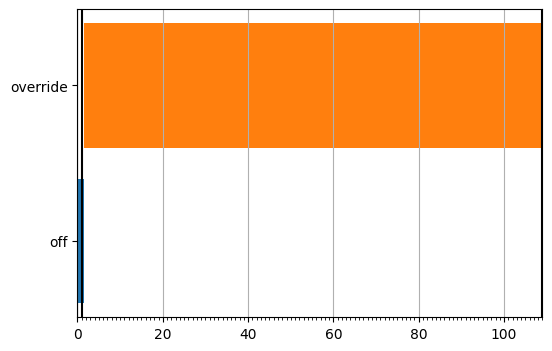

In [14]:
phase_fig = pm['override'].plot()

## Testing Faults

In [15]:
#app=SampleApproach(mdl, faults='Controller', phases={'drive':phases['Operations']['drive']})

fd = FaultDomain(mdl)
fd.add_all_fxn_modes('operator')
fd

FaultDomain with faults:
 -('operator', 'look_failed_no_action')
 -('operator', 'percieve_failed_no_action')
 -('operator', 'percieve_not_visible')
 -('operator', 'percieve_wrong_position')
 -('operator', 'comprehend_failed_no_action')
 -('operator', 'project_failed_turn_left')
 -('operator', 'project_failed_turn_right')
 -('operator', 'project_failed_slow')
 -('operator', 'project_failed_fast')
 -('operator', 'project_failed_no_action')
 -...more

In [16]:
fs = FaultSample(fd, phasemap = pm['override'])
fs.add_fault_phases('override')
fs

FaultSample of scenarios: 
 - operator_look_failed_no_action_t56p0
 - operator_percieve_failed_no_action_t56p0
 - operator_percieve_not_visible_t56p0
 - operator_percieve_wrong_position_t56p0
 - operator_comprehend_failed_no_action_t56p0
 - operator_project_failed_turn_left_t56p0
 - operator_project_failed_turn_right_t56p0
 - operator_project_failed_slow_t56p0
 - operator_project_failed_fast_t56p0
 - operator_project_failed_no_action_t56p0
 - ... (19 total)

In [17]:
fs.scenarios()

[SingleFaultScenario(sequence={56.0: Injection(faults={'operator': ['look_failed_no_action']}, disturbances={})}, times=(56.0,), function='operator', fault='look_failed_no_action', rate=1.0, name='operator_look_failed_no_action_t56p0', time=56.0, phase='override'),
 SingleFaultScenario(sequence={56.0: Injection(faults={'operator': ['percieve_failed_no_action']}, disturbances={})}, times=(56.0,), function='operator', fault='percieve_failed_no_action', rate=0.3333333333333333, name='operator_percieve_failed_no_action_t56p0', time=56.0, phase='override'),
 SingleFaultScenario(sequence={56.0: Injection(faults={'operator': ['percieve_not_visible']}, disturbances={})}, times=(56.0,), function='operator', fault='percieve_not_visible', rate=0.3333333333333333, name='operator_percieve_not_visible_t56p0', time=56.0, phase='override'),
 SingleFaultScenario(sequence={56.0: Injection(faults={'operator': ['percieve_wrong_position']}, disturbances={})}, times=(56.0,), function='operator', fault='perc

In [18]:
ecs, hists = prop.fault_sample(mdl, fs)

SCENARIOS COMPLETE:   0%|          | 0/19 [00:00<?, ?it/s]

SCENARIOS COMPLETE:   5%|▌         | 1/19 [00:00<00:03,  5.02it/s]

SCENARIOS COMPLETE:  11%|█         | 2/19 [00:00<00:04,  3.64it/s]

SCENARIOS COMPLETE:  16%|█▌        | 3/19 [00:00<00:04,  3.34it/s]

SCENARIOS COMPLETE:  21%|██        | 4/19 [00:01<00:04,  3.23it/s]

SCENARIOS COMPLETE:  26%|██▋       | 5/19 [00:01<00:03,  3.75it/s]

SCENARIOS COMPLETE:  32%|███▏      | 6/19 [00:01<00:03,  4.12it/s]

SCENARIOS COMPLETE:  37%|███▋      | 7/19 [00:01<00:02,  4.44it/s]

SCENARIOS COMPLETE:  42%|████▏     | 8/19 [00:02<00:03,  3.26it/s]

SCENARIOS COMPLETE:  47%|████▋     | 9/19 [00:02<00:02,  3.70it/s]

SCENARIOS COMPLETE:  53%|█████▎    | 10/19 [00:02<00:02,  4.01it/s]

SCENARIOS COMPLETE:  58%|█████▊    | 11/19 [00:02<00:01,  4.29it/s]

SCENARIOS COMPLETE:  63%|██████▎   | 12/19 [00:03<00:01,  4.36it/s]

SCENARIOS COMPLETE:  68%|██████▊   | 13/19 [00:03<00:01,  4.56it/s]

SCENARIOS COMPLETE:  74%|███████▎  | 14/19 [00:03<00:01,  4.67it/s]

SCENARIOS COMPLETE:  79%|███████▉  | 15/19 [00:03<00:00,  4.78it/s]

SCENARIOS COMPLETE:  84%|████████▍ | 16/19 [00:03<00:00,  4.87it/s]

SCENARIOS COMPLETE:  89%|████████▉ | 17/19 [00:04<00:00,  4.07it/s]

SCENARIOS COMPLETE:  95%|█████████▍| 18/19 [00:04<00:00,  3.66it/s]

SCENARIOS COMPLETE: 100%|██████████| 19/19 [00:04<00:00,  3.42it/s]

SCENARIOS COMPLETE: 100%|██████████| 19/19 [00:04<00:00,  3.91it/s]

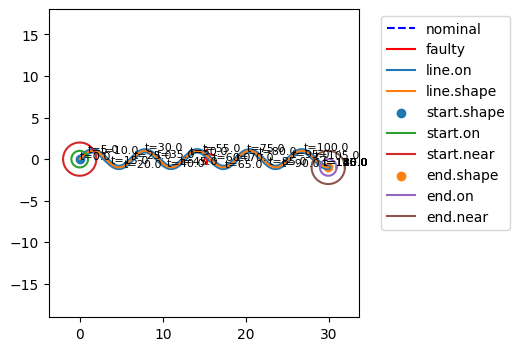

In [19]:
fig, ax = plot_map(mdl, hists)

(-5.0, 5.0)

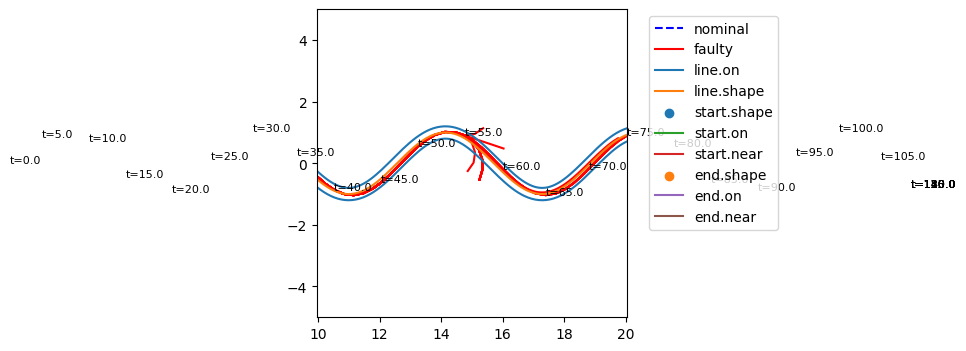

In [20]:
fig, ax = plot_map(mdl, hists)
ax.set_xlim(10, 20)
ax.set_ylim(-5, 5)

In [21]:
fig.savefig("rover_map.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

Below shows the impact of each fault:

In [22]:
tab = an.tabulate.result_summary_fmea(ecs, hists,
                                      *mdl.flows, *mdl.fxns,
                                      metrics = ["in_bound", "at_finish", "end_dist", "faults", "classification", "end_x", "end_y"])
tab

,degraded,faulty,in_bound,at_finish,end_dist,faults,classification,end_x,end_y
operator_look_failed_no_action_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",['operator'],False,False,13.663813,{'operator': ['look_failed_no_action']},incomplete mission faulty,15.24424,-0.529458
operator_percieve_failed_no_action_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",[],True,True,0.0,{},nominal mission,29.254775,-0.782764
operator_percieve_not_visible_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",[],True,True,0.0,{},nominal mission,29.254775,-0.782764
operator_percieve_wrong_position_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",[],True,True,0.0,{},nominal mission,29.254775,-0.782764
operator_comprehend_failed_no_action_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",['operator'],False,False,13.663813,"{'operator': ['percieve_not_visible', 'compreh...",incomplete mission faulty,15.24424,-0.529458
operator_project_failed_turn_left_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",['operator'],False,False,14.057688,"{'operator': ['project_failed_turn_left', 'per...",incomplete mission faulty,14.862043,-0.251773
operator_project_failed_turn_right_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",['operator'],False,False,13.693675,"{'operator': ['project_failed_turn_right', 'pe...",incomplete mission faulty,15.363988,1.140047
operator_project_failed_slow_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",['operator'],True,False,9.31949,{'operator': ['project_failed_slow']},incomplete mission faulty,19.740872,0.81243
operator_project_failed_fast_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",['operator'],False,False,12.955107,"{'operator': ['percieve_not_visible', 'project...",incomplete mission faulty,16.023518,0.480458
operator_project_failed_no_action_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",['operator'],False,False,13.663813,"{'operator': ['percieve_not_visible', 'project...",incomplete mission faulty,15.24424,-0.529458


In [23]:
tab.sort_values('end_dist', ascending=False)

,degraded,faulty,in_bound,at_finish,end_dist,faults,classification,end_x,end_y
operator_project_failed_turn_left_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",['operator'],False,False,14.057688,"{'operator': ['project_failed_turn_left', 'per...",incomplete mission faulty,14.862043,-0.251773
operator_project_failed_turn_right_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",['operator'],False,False,13.693675,"{'operator': ['project_failed_turn_right', 'pe...",incomplete mission faulty,15.363988,1.140047
operator_look_failed_no_action_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",['operator'],False,False,13.663813,{'operator': ['look_failed_no_action']},incomplete mission faulty,15.24424,-0.529458
operator_project_failed_no_action_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",['operator'],False,False,13.663813,"{'operator': ['percieve_not_visible', 'project...",incomplete mission faulty,15.24424,-0.529458
operator_reach_failed_no_action_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",['operator'],False,False,13.663813,"{'operator': ['percieve_not_visible', 'reach_f...",incomplete mission faulty,15.24424,-0.529458
operator_decide_failed_no_action_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",['operator'],False,False,13.663813,"{'operator': ['percieve_not_visible', 'decide_...",incomplete mission faulty,15.24424,-0.529458
operator_decide_failed_fast_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",['operator'],False,False,13.663813,"{'operator': ['decide_failed_fast', 'percieve_...",incomplete mission faulty,15.24424,-0.529458
operator_decide_failed_slow_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",['operator'],False,False,13.663813,"{'operator': ['decide_failed_slow', 'percieve_...",incomplete mission faulty,15.24424,-0.529458
operator_decide_failed_turn_right_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",['operator'],False,False,13.663813,"{'operator': ['decide_failed_turn_right', 'per...",incomplete mission faulty,15.24424,-0.529458
operator_decide_failed_turn_left_t56p0,"['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5',...",['operator'],False,False,13.663813,"{'operator': ['percieve_not_visible', 'decide_...",incomplete mission faulty,15.24424,-0.529458


In [24]:
print(tab.to_latex())

\begin{tabular}{llllllllll}
\toprule
 & degraded & faulty & in_bound & at_finish & end_dist & faults & classification & end_x & end_y \\
\midrule
operator_look_failed_no_action_t56p0 & ['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5', 'ee_15', 'video', 'auto_control', 'motor_control', 'switch', 'comms', 'fault_sig', 'power', 'perception', 'override', 'drive'] & ['operator'] & False & False & 13.663813 & {'operator': ['look_failed_no_action']} & incomplete mission faulty & 15.244240 & -0.529458 \\
operator_percieve_failed_no_action_t56p0 & ['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5', 'ee_15', 'video', 'auto_control', 'motor_control', 'switch', 'comms', 'fault_sig', 'power', 'perception', 'operator', 'plan_path', 'override', 'drive'] & [] & True & True & 0.000000 & {} & nominal mission & 29.254775 & -0.782764 \\
operator_percieve_not_visible_t56p0 & ['psfs', 'pos_signal', 'pos', 'ee_12', 'ee_5', 'ee_15', 'video', 'auto_control', 'motor_control', 'switch', 'comms', 'fault_sig', 'power', 'p

As shown, most modes now have an effect.

## Examining Performance Shaping Factors

In [25]:
from examples.rover.rover_model_human import RoverHumanParam
pd = ParameterDomain(RoverHumanParam)
#pd.add_constant('ground.linetype', 'sine')
#pd.add_constant('ground.amp', 4)
pd.add_variable('psfs.fatigue', var_lim=(0, 11))
pd.add_variable('psfs.attention', var_lim=(0, 11))
pd

ParameterDomain with:
 - variables: {'psfs.fatigue': (0, 11), 'psfs.attention': (0, 11)}
 - constants: {}
 - parameter_initializer: RoverHumanParam

In [26]:
ps = ParameterSample(pd)
ps.add_variable_ranges(comb_kwargs={'resolution': 1})
ps

ParameterSample of scenarios:
 - rep0_range_0
 - rep0_range_1
 - rep0_range_2
 - rep0_range_3
 - rep0_range_4
 - rep0_range_5
 - rep0_range_6
 - rep0_range_7
 - rep0_range_8
 - rep0_range_9
 - ... (144 total)

In [27]:
ps.scenarios()

[ParameterScenario(sequence={}, times=(), p={'psfs': {'fatigue': 0, 'attention': 0}}, r={}, sp={}, prob=0.006944444444444444, inputparams={0: 0, 1: 0}, rangeid='', name='rep0_range_0'),
 ParameterScenario(sequence={}, times=(), p={'psfs': {'fatigue': 0, 'attention': 1}}, r={}, sp={}, prob=0.006944444444444444, inputparams={0: 0, 1: 1}, rangeid='', name='rep0_range_1'),
 ParameterScenario(sequence={}, times=(), p={'psfs': {'fatigue': 0, 'attention': 2}}, r={}, sp={}, prob=0.006944444444444444, inputparams={0: 0, 1: 2}, rangeid='', name='rep0_range_2'),
 ParameterScenario(sequence={}, times=(), p={'psfs': {'fatigue': 0, 'attention': 3}}, r={}, sp={}, prob=0.006944444444444444, inputparams={0: 0, 1: 3}, rangeid='', name='rep0_range_3'),
 ParameterScenario(sequence={}, times=(), p={'psfs': {'fatigue': 0, 'attention': 4}}, r={}, sp={}, prob=0.006944444444444444, inputparams={0: 0, 1: 4}, rangeid='', name='rep0_range_4'),
 ParameterScenario(sequence={}, times=(), p={'psfs': {'fatigue': 0, 'a

In [28]:
ers, hists = prop.parameter_sample(mdl, ps)

SCENARIOS COMPLETE:   0%|          | 0/144 [00:00<?, ?it/s]

SCENARIOS COMPLETE:   1%|          | 1/144 [00:00<01:00,  2.36it/s]

SCENARIOS COMPLETE:   1%|▏         | 2/144 [00:00<01:00,  2.34it/s]

SCENARIOS COMPLETE:   2%|▏         | 3/144 [00:01<01:00,  2.35it/s]

SCENARIOS COMPLETE:   3%|▎         | 4/144 [00:01<00:59,  2.35it/s]

SCENARIOS COMPLETE:   3%|▎         | 5/144 [00:02<00:59,  2.35it/s]

SCENARIOS COMPLETE:   4%|▍         | 6/144 [00:02<00:59,  2.31it/s]

SCENARIOS COMPLETE:   5%|▍         | 7/144 [00:02<00:58,  2.34it/s]

SCENARIOS COMPLETE:   6%|▌         | 8/144 [00:03<00:59,  2.30it/s]

SCENARIOS COMPLETE:   6%|▋         | 9/144 [00:03<00:57,  2.34it/s]

SCENARIOS COMPLETE:   7%|▋         | 10/144 [00:04<00:57,  2.34it/s]

SCENARIOS COMPLETE:   8%|▊         | 11/144 [00:04<00:56,  2.36it/s]

SCENARIOS COMPLETE:   8%|▊         | 12/144 [00:05<00:56,  2.34it/s]

SCENARIOS COMPLETE:   9%|▉         | 13/144 [00:05<00:55,  2.34it/s]

SCENARIOS COMPLETE:  10%|▉         | 14/144 [00:05<00:55,  2.35it/s]

SCENARIOS COMPLETE:  10%|█         | 15/144 [00:06<00:54,  2.35it/s]

SCENARIOS COMPLETE:  11%|█         | 16/144 [00:06<00:54,  2.37it/s]

SCENARIOS COMPLETE:  12%|█▏        | 17/144 [00:07<00:53,  2.37it/s]

SCENARIOS COMPLETE:  12%|█▎        | 18/144 [00:07<00:53,  2.34it/s]

SCENARIOS COMPLETE:  13%|█▎        | 19/144 [00:08<00:53,  2.33it/s]

SCENARIOS COMPLETE:  14%|█▍        | 20/144 [00:08<00:53,  2.33it/s]

SCENARIOS COMPLETE:  15%|█▍        | 21/144 [00:08<00:53,  2.32it/s]

SCENARIOS COMPLETE:  15%|█▌        | 22/144 [00:09<00:53,  2.29it/s]

SCENARIOS COMPLETE:  16%|█▌        | 23/144 [00:09<00:53,  2.28it/s]

SCENARIOS COMPLETE:  17%|█▋        | 24/144 [00:10<00:52,  2.28it/s]

SCENARIOS COMPLETE:  17%|█▋        | 25/144 [00:10<00:51,  2.30it/s]

SCENARIOS COMPLETE:  18%|█▊        | 26/144 [00:11<00:51,  2.31it/s]

SCENARIOS COMPLETE:  19%|█▉        | 27/144 [00:11<00:50,  2.33it/s]

SCENARIOS COMPLETE:  19%|█▉        | 28/144 [00:12<00:49,  2.35it/s]

SCENARIOS COMPLETE:  20%|██        | 29/144 [00:12<00:48,  2.36it/s]

SCENARIOS COMPLETE:  21%|██        | 30/144 [00:12<00:48,  2.37it/s]

SCENARIOS COMPLETE:  22%|██▏       | 31/144 [00:13<00:48,  2.33it/s]

SCENARIOS COMPLETE:  22%|██▏       | 32/144 [00:13<00:47,  2.33it/s]

SCENARIOS COMPLETE:  23%|██▎       | 33/144 [00:14<00:47,  2.32it/s]

SCENARIOS COMPLETE:  24%|██▎       | 34/144 [00:14<00:47,  2.29it/s]

SCENARIOS COMPLETE:  24%|██▍       | 35/144 [00:15<00:47,  2.31it/s]

SCENARIOS COMPLETE:  25%|██▌       | 36/144 [00:15<00:46,  2.33it/s]

SCENARIOS COMPLETE:  26%|██▌       | 37/144 [00:15<00:45,  2.35it/s]

SCENARIOS COMPLETE:  26%|██▋       | 38/144 [00:16<00:44,  2.36it/s]

SCENARIOS COMPLETE:  27%|██▋       | 39/144 [00:16<00:44,  2.37it/s]

SCENARIOS COMPLETE:  28%|██▊       | 40/144 [00:17<00:43,  2.37it/s]

SCENARIOS COMPLETE:  28%|██▊       | 41/144 [00:17<00:43,  2.37it/s]

SCENARIOS COMPLETE:  29%|██▉       | 42/144 [00:17<00:43,  2.36it/s]

SCENARIOS COMPLETE:  30%|██▉       | 43/144 [00:18<00:42,  2.36it/s]

SCENARIOS COMPLETE:  31%|███       | 44/144 [00:18<00:42,  2.36it/s]

SCENARIOS COMPLETE:  31%|███▏      | 45/144 [00:19<00:41,  2.36it/s]

SCENARIOS COMPLETE:  32%|███▏      | 46/144 [00:19<00:41,  2.36it/s]

SCENARIOS COMPLETE:  33%|███▎      | 47/144 [00:20<00:40,  2.37it/s]

SCENARIOS COMPLETE:  33%|███▎      | 48/144 [00:20<00:40,  2.38it/s]

SCENARIOS COMPLETE:  34%|███▍      | 49/144 [00:20<00:39,  2.38it/s]

SCENARIOS COMPLETE:  35%|███▍      | 50/144 [00:21<00:39,  2.39it/s]

SCENARIOS COMPLETE:  35%|███▌      | 51/144 [00:21<00:38,  2.40it/s]

SCENARIOS COMPLETE:  36%|███▌      | 52/144 [00:22<00:38,  2.40it/s]

SCENARIOS COMPLETE:  37%|███▋      | 53/144 [00:22<00:37,  2.40it/s]

SCENARIOS COMPLETE:  38%|███▊      | 54/144 [00:23<00:38,  2.32it/s]

SCENARIOS COMPLETE:  38%|███▊      | 55/144 [00:23<00:38,  2.31it/s]

SCENARIOS COMPLETE:  39%|███▉      | 56/144 [00:23<00:38,  2.31it/s]

SCENARIOS COMPLETE:  40%|███▉      | 57/144 [00:24<00:37,  2.33it/s]

SCENARIOS COMPLETE:  40%|████      | 58/144 [00:24<00:36,  2.33it/s]

SCENARIOS COMPLETE:  41%|████      | 59/144 [00:25<00:36,  2.30it/s]

SCENARIOS COMPLETE:  42%|████▏     | 60/144 [00:25<00:36,  2.29it/s]

SCENARIOS COMPLETE:  42%|████▏     | 61/144 [00:26<00:35,  2.33it/s]

SCENARIOS COMPLETE:  43%|████▎     | 62/144 [00:26<00:36,  2.27it/s]

SCENARIOS COMPLETE:  44%|████▍     | 63/144 [00:27<00:36,  2.21it/s]

SCENARIOS COMPLETE:  44%|████▍     | 64/144 [00:27<00:36,  2.17it/s]

SCENARIOS COMPLETE:  45%|████▌     | 65/144 [00:27<00:35,  2.22it/s]

SCENARIOS COMPLETE:  46%|████▌     | 66/144 [00:28<00:35,  2.18it/s]

SCENARIOS COMPLETE:  47%|████▋     | 67/144 [00:28<00:34,  2.22it/s]

SCENARIOS COMPLETE:  47%|████▋     | 68/144 [00:29<00:33,  2.26it/s]

SCENARIOS COMPLETE:  48%|████▊     | 69/144 [00:29<00:32,  2.28it/s]

SCENARIOS COMPLETE:  49%|████▊     | 70/144 [00:30<00:31,  2.31it/s]

SCENARIOS COMPLETE:  49%|████▉     | 71/144 [00:30<00:31,  2.32it/s]

SCENARIOS COMPLETE:  50%|█████     | 72/144 [00:30<00:31,  2.32it/s]

SCENARIOS COMPLETE:  51%|█████     | 73/144 [00:31<00:30,  2.34it/s]

SCENARIOS COMPLETE:  51%|█████▏    | 74/144 [00:31<00:30,  2.32it/s]

SCENARIOS COMPLETE:  52%|█████▏    | 75/144 [00:32<00:29,  2.33it/s]

SCENARIOS COMPLETE:  53%|█████▎    | 76/144 [00:32<00:29,  2.34it/s]

SCENARIOS COMPLETE:  53%|█████▎    | 77/144 [00:33<00:28,  2.35it/s]

SCENARIOS COMPLETE:  54%|█████▍    | 78/144 [00:33<00:28,  2.35it/s]

SCENARIOS COMPLETE:  55%|█████▍    | 79/144 [00:33<00:27,  2.35it/s]

SCENARIOS COMPLETE:  56%|█████▌    | 80/144 [00:34<00:27,  2.36it/s]

SCENARIOS COMPLETE:  56%|█████▋    | 81/144 [00:34<00:26,  2.36it/s]

SCENARIOS COMPLETE:  57%|█████▋    | 82/144 [00:35<00:26,  2.38it/s]

SCENARIOS COMPLETE:  58%|█████▊    | 83/144 [00:35<00:25,  2.37it/s]

SCENARIOS COMPLETE:  58%|█████▊    | 84/144 [00:36<00:25,  2.38it/s]

SCENARIOS COMPLETE:  59%|█████▉    | 85/144 [00:36<00:24,  2.38it/s]

SCENARIOS COMPLETE:  60%|█████▉    | 86/144 [00:36<00:24,  2.38it/s]

SCENARIOS COMPLETE:  60%|██████    | 87/144 [00:37<00:24,  2.37it/s]

SCENARIOS COMPLETE:  61%|██████    | 88/144 [00:37<00:23,  2.38it/s]

SCENARIOS COMPLETE:  62%|██████▏   | 89/144 [00:38<00:23,  2.38it/s]

SCENARIOS COMPLETE:  62%|██████▎   | 90/144 [00:38<00:22,  2.38it/s]

SCENARIOS COMPLETE:  63%|██████▎   | 91/144 [00:38<00:22,  2.37it/s]

SCENARIOS COMPLETE:  64%|██████▍   | 92/144 [00:39<00:21,  2.37it/s]

SCENARIOS COMPLETE:  65%|██████▍   | 93/144 [00:39<00:21,  2.35it/s]

SCENARIOS COMPLETE:  65%|██████▌   | 94/144 [00:40<00:21,  2.35it/s]

SCENARIOS COMPLETE:  66%|██████▌   | 95/144 [00:40<00:20,  2.36it/s]

SCENARIOS COMPLETE:  67%|██████▋   | 96/144 [00:41<00:20,  2.31it/s]

SCENARIOS COMPLETE:  67%|██████▋   | 97/144 [00:41<00:20,  2.30it/s]

SCENARIOS COMPLETE:  68%|██████▊   | 98/144 [00:42<00:20,  2.30it/s]

SCENARIOS COMPLETE:  69%|██████▉   | 99/144 [00:42<00:19,  2.31it/s]

SCENARIOS COMPLETE:  69%|██████▉   | 100/144 [00:42<00:18,  2.32it/s]

SCENARIOS COMPLETE:  70%|███████   | 101/144 [00:43<00:18,  2.32it/s]

SCENARIOS COMPLETE:  71%|███████   | 102/144 [00:43<00:18,  2.32it/s]

SCENARIOS COMPLETE:  72%|███████▏  | 103/144 [00:44<00:17,  2.34it/s]

SCENARIOS COMPLETE:  72%|███████▏  | 104/144 [00:44<00:16,  2.35it/s]

SCENARIOS COMPLETE:  73%|███████▎  | 105/144 [00:45<00:16,  2.35it/s]

SCENARIOS COMPLETE:  74%|███████▎  | 106/144 [00:45<00:16,  2.34it/s]

SCENARIOS COMPLETE:  74%|███████▍  | 107/144 [00:45<00:15,  2.32it/s]

SCENARIOS COMPLETE:  75%|███████▌  | 108/144 [00:46<00:15,  2.27it/s]

SCENARIOS COMPLETE:  76%|███████▌  | 109/144 [00:46<00:15,  2.29it/s]

SCENARIOS COMPLETE:  76%|███████▋  | 110/144 [00:47<00:14,  2.27it/s]

SCENARIOS COMPLETE:  77%|███████▋  | 111/144 [00:47<00:14,  2.30it/s]

SCENARIOS COMPLETE:  78%|███████▊  | 112/144 [00:48<00:13,  2.32it/s]

SCENARIOS COMPLETE:  78%|███████▊  | 113/144 [00:48<00:13,  2.34it/s]

SCENARIOS COMPLETE:  79%|███████▉  | 114/144 [00:48<00:12,  2.36it/s]

SCENARIOS COMPLETE:  80%|███████▉  | 115/144 [00:49<00:12,  2.35it/s]

SCENARIOS COMPLETE:  81%|████████  | 116/144 [00:49<00:12,  2.33it/s]

SCENARIOS COMPLETE:  81%|████████▏ | 117/144 [00:50<00:11,  2.30it/s]

SCENARIOS COMPLETE:  82%|████████▏ | 118/144 [00:50<00:11,  2.30it/s]

SCENARIOS COMPLETE:  83%|████████▎ | 119/144 [00:51<00:10,  2.29it/s]

SCENARIOS COMPLETE:  83%|████████▎ | 120/144 [00:51<00:10,  2.28it/s]

SCENARIOS COMPLETE:  84%|████████▍ | 121/144 [00:51<00:10,  2.26it/s]

SCENARIOS COMPLETE:  85%|████████▍ | 122/144 [00:52<00:09,  2.28it/s]

SCENARIOS COMPLETE:  85%|████████▌ | 123/144 [00:52<00:09,  2.32it/s]

SCENARIOS COMPLETE:  86%|████████▌ | 124/144 [00:53<00:08,  2.29it/s]

SCENARIOS COMPLETE:  87%|████████▋ | 125/144 [00:53<00:08,  2.28it/s]

SCENARIOS COMPLETE:  88%|████████▊ | 126/144 [00:54<00:07,  2.31it/s]

SCENARIOS COMPLETE:  88%|████████▊ | 127/144 [00:54<00:07,  2.33it/s]

SCENARIOS COMPLETE:  89%|████████▉ | 128/144 [00:54<00:06,  2.31it/s]

SCENARIOS COMPLETE:  90%|████████▉ | 129/144 [00:55<00:06,  2.28it/s]

SCENARIOS COMPLETE:  90%|█████████ | 130/144 [00:55<00:06,  2.29it/s]

SCENARIOS COMPLETE:  91%|█████████ | 131/144 [00:56<00:05,  2.31it/s]

SCENARIOS COMPLETE:  92%|█████████▏| 132/144 [00:56<00:05,  2.33it/s]

SCENARIOS COMPLETE:  92%|█████████▏| 133/144 [00:57<00:04,  2.28it/s]

SCENARIOS COMPLETE:  93%|█████████▎| 134/144 [00:57<00:04,  2.27it/s]

SCENARIOS COMPLETE:  94%|█████████▍| 135/144 [00:58<00:03,  2.30it/s]

SCENARIOS COMPLETE:  94%|█████████▍| 136/144 [00:58<00:03,  2.26it/s]

SCENARIOS COMPLETE:  95%|█████████▌| 137/144 [00:58<00:03,  2.30it/s]

SCENARIOS COMPLETE:  96%|█████████▌| 138/144 [00:59<00:02,  2.32it/s]

SCENARIOS COMPLETE:  97%|█████████▋| 139/144 [00:59<00:02,  2.35it/s]

SCENARIOS COMPLETE:  97%|█████████▋| 140/144 [01:00<00:01,  2.37it/s]

SCENARIOS COMPLETE:  98%|█████████▊| 141/144 [01:00<00:01,  2.27it/s]

SCENARIOS COMPLETE:  99%|█████████▊| 142/144 [01:01<00:00,  2.29it/s]

SCENARIOS COMPLETE:  99%|█████████▉| 143/144 [01:01<00:00,  2.22it/s]

SCENARIOS COMPLETE: 100%|██████████| 144/144 [01:02<00:00,  2.25it/s]

SCENARIOS COMPLETE: 100%|██████████| 144/144 [01:02<00:00,  2.32it/s]

(<Figure size 400x400 with 1 Axes>, <Axes: >)

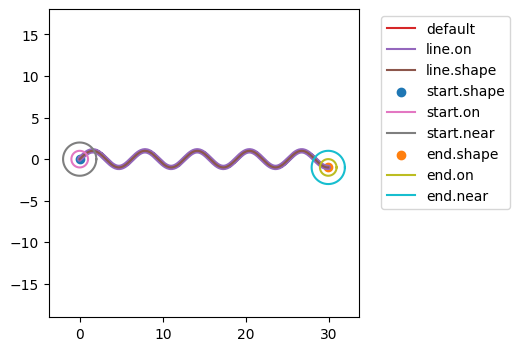

In [29]:
plot_map(mdl, hists)

In [30]:
ers.get_values("end_x")

rep0_range_0.endclass.end_x: 29.254775331608617
rep0_range_1.endclass.end_x: 29.254775331608617
rep0_range_2.endclass.end_x: 29.254775331608617
rep0_range_3.endclass.end_x: 29.254775331608617
rep0_range_4.endclass.end_x: 29.254775331608617
rep0_range_5.endclass.end_x: 29.254775331608617
rep0_range_6.endclass.end_x: 29.254775331608617
rep0_range_7.endclass.end_x: 29.254775331608617
rep0_range_8.endclass.end_x: 29.254775331608617
rep0_range_9.endclass.end_x: 29.254775331608617
rep0_range_10.endclass.end_x: 29.254775331608617
rep0_range_11.endclass.end_x: 29.254775331608617
rep0_range_12.endclass.end_x: 29.254775331608617
rep0_range_13.endclass.end_x: 29.254775331608617
rep0_range_14.endclass.end_x: 29.254775331608617
rep0_range_15.endclass.end_x: 29.254775331608617
rep0_range_16.endclass.end_x: 29.254775331608617
rep0_range_17.endclass.end_x: 29.254775331608617
rep0_range_18.endclass.end_x: 29.254775331608617
rep0_range_19.endclass.end_x: 29.254775331608617
rep0_range_20.endclass.end_x: 

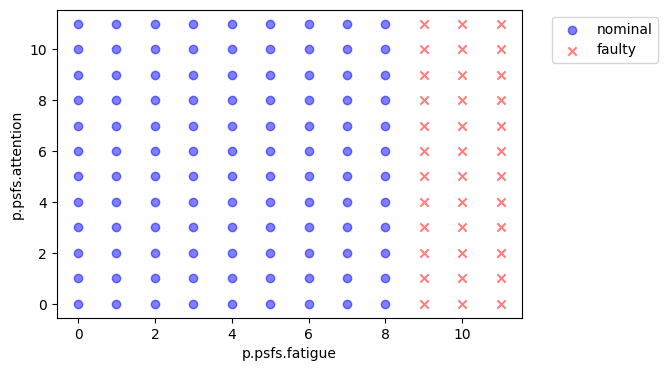

In [31]:
from fmdtools.analyze.tabulate import NominalEnvelope
na = NominalEnvelope(ps, ers, 'at_finish', 'p.psfs.fatigue', 'p.psfs.attention', func= lambda x: x)
fig, ax = na.plot_scatter()

In [32]:
fig.savefig("nominal_psfs.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [33]:
mdl = RoverHuman(p={'ground': {'linetype': 'turn'}})
endresults, mdlhist = prop.one_fault(mdl, 'operator', 'look_failed_no_action', time=15)

In [34]:
endresults

endclass.rate:                       1.0
endclass.cost:                         0
endclass.prob:                       1.0
endclass.expected_cost:                0
endclass.in_bound:                 False
endclass.at_finish:                False
endclass.line_dist:                    1
endclass.num_modes:                    1
endclass.end_dist:    23.466067426611588
endclass.tot_deviation: 0.2759017544282031
endclass.faults: {'operator': ['look_failed_no_action']}
endclass.classification: incomplete mission faulty
endclass.end_x:        13.33333333333334
endclass.end_y:                      0.0
endclass.endpt:                 array(2)

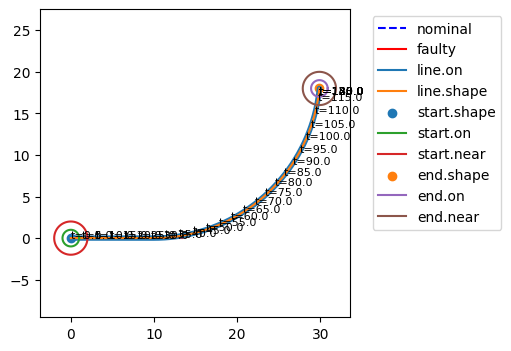

In [35]:
traj_fig = plot_map(mdl, mdlhist)

(<Figure size 400x400 with 1 Axes>, <Axes: >)

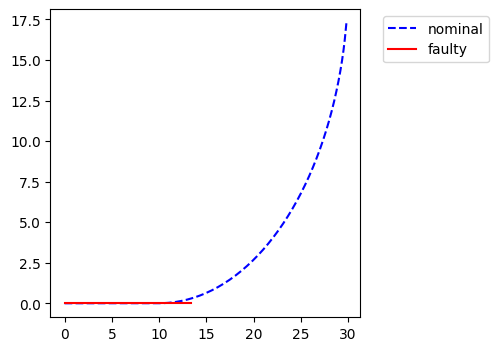

In [36]:
mdlhist.plot_trajectories('flows.pos.s.x', 'flows.pos.s.y')

(<Figure size 600x400 with 4 Axes>,
 array([<Axes: title={'center': 'flows.pos.s.vel'}, xlabel=' '>,
        <Axes: title={'center': 'flows.pos.s.ux'}, xlabel='time'>,
        <Axes: title={'center': 'flows.pos.s.uy'}, xlabel='time'>,
        <Axes: >], dtype=object))

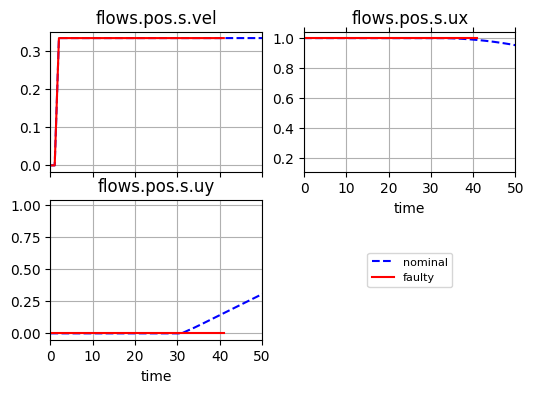

In [37]:
mdlhist.plot_line('flows.pos.s.vel', 'flows.pos.s.ux', 'flows.pos.s.uy')

In [38]:
fs = FaultSample(fd)
fs.add_fault_times([j for j in range(0, 30, 5)])
fs

FaultSample of scenarios: 
 - operator_look_failed_no_action_t0
 - operator_look_failed_no_action_t5
 - operator_look_failed_no_action_t10
 - operator_look_failed_no_action_t15
 - operator_look_failed_no_action_t20
 - operator_look_failed_no_action_t25
 - operator_percieve_failed_no_action_t0
 - operator_percieve_failed_no_action_t5
 - operator_percieve_failed_no_action_t10
 - operator_percieve_failed_no_action_t15
 - ... (114 total)

In [39]:
ers, hists = prop.fault_sample(mdl, fs)

SCENARIOS COMPLETE:   0%|          | 0/114 [00:00<?, ?it/s]

SCENARIOS COMPLETE:   1%|          | 1/114 [00:00<00:45,  2.47it/s]

SCENARIOS COMPLETE:   2%|▏         | 2/114 [00:00<00:27,  4.06it/s]

SCENARIOS COMPLETE:   3%|▎         | 3/114 [00:00<00:21,  5.11it/s]

SCENARIOS COMPLETE:   4%|▎         | 4/114 [00:00<00:19,  5.79it/s]

SCENARIOS COMPLETE:   4%|▍         | 5/114 [00:00<00:17,  6.23it/s]

SCENARIOS COMPLETE:   5%|▌         | 6/114 [00:01<00:16,  6.52it/s]

SCENARIOS COMPLETE:   6%|▌         | 7/114 [00:01<00:24,  4.38it/s]

SCENARIOS COMPLETE:   7%|▋         | 8/114 [00:01<00:29,  3.65it/s]

SCENARIOS COMPLETE:   8%|▊         | 9/114 [00:02<00:31,  3.32it/s]

SCENARIOS COMPLETE:   9%|▉         | 10/114 [00:02<00:33,  3.10it/s]

SCENARIOS COMPLETE:  10%|▉         | 11/114 [00:02<00:34,  2.95it/s]

SCENARIOS COMPLETE:  11%|█         | 12/114 [00:03<00:35,  2.91it/s]

SCENARIOS COMPLETE:  11%|█▏        | 13/114 [00:03<00:34,  2.89it/s]

SCENARIOS COMPLETE:  12%|█▏        | 14/114 [00:04<00:34,  2.88it/s]

SCENARIOS COMPLETE:  13%|█▎        | 15/114 [00:04<00:34,  2.88it/s]

SCENARIOS COMPLETE:  14%|█▍        | 16/114 [00:04<00:34,  2.85it/s]

SCENARIOS COMPLETE:  15%|█▍        | 17/114 [00:05<00:34,  2.84it/s]

SCENARIOS COMPLETE:  16%|█▌        | 18/114 [00:05<00:33,  2.84it/s]

SCENARIOS COMPLETE:  17%|█▋        | 19/114 [00:05<00:33,  2.80it/s]

SCENARIOS COMPLETE:  18%|█▊        | 20/114 [00:06<00:33,  2.79it/s]

SCENARIOS COMPLETE:  18%|█▊        | 21/114 [00:06<00:33,  2.78it/s]

SCENARIOS COMPLETE:  19%|█▉        | 22/114 [00:06<00:32,  2.80it/s]

SCENARIOS COMPLETE:  20%|██        | 23/114 [00:07<00:32,  2.81it/s]

SCENARIOS COMPLETE:  21%|██        | 24/114 [00:07<00:31,  2.81it/s]

SCENARIOS COMPLETE:  22%|██▏       | 25/114 [00:07<00:33,  2.68it/s]

SCENARIOS COMPLETE:  23%|██▎       | 26/114 [00:08<00:26,  3.33it/s]

SCENARIOS COMPLETE:  24%|██▎       | 27/114 [00:08<00:21,  3.96it/s]

SCENARIOS COMPLETE:  25%|██▍       | 28/114 [00:08<00:18,  4.57it/s]

SCENARIOS COMPLETE:  25%|██▌       | 29/114 [00:08<00:16,  5.12it/s]

SCENARIOS COMPLETE:  26%|██▋       | 30/114 [00:08<00:15,  5.59it/s]

SCENARIOS COMPLETE:  29%|██▉       | 33/114 [00:08<00:08,  9.49it/s]

SCENARIOS COMPLETE:  31%|███       | 35/114 [00:08<00:07, 10.43it/s]

SCENARIOS COMPLETE:  32%|███▏      | 37/114 [00:09<00:06, 11.53it/s]

SCENARIOS COMPLETE:  34%|███▍      | 39/114 [00:09<00:05, 13.31it/s]

SCENARIOS COMPLETE:  36%|███▌      | 41/114 [00:09<00:05, 13.03it/s]

SCENARIOS COMPLETE:  38%|███▊      | 43/114 [00:09<00:09,  7.38it/s]

SCENARIOS COMPLETE:  39%|███▉      | 45/114 [00:10<00:15,  4.47it/s]

SCENARIOS COMPLETE:  40%|████      | 46/114 [00:11<00:16,  4.05it/s]

SCENARIOS COMPLETE:  41%|████      | 47/114 [00:11<00:17,  3.88it/s]

SCENARIOS COMPLETE:  42%|████▏     | 48/114 [00:11<00:16,  3.91it/s]

SCENARIOS COMPLETE:  44%|████▍     | 50/114 [00:11<00:12,  5.25it/s]

SCENARIOS COMPLETE:  45%|████▍     | 51/114 [00:11<00:10,  5.86it/s]

SCENARIOS COMPLETE:  46%|████▌     | 52/114 [00:12<00:09,  6.44it/s]

SCENARIOS COMPLETE:  46%|████▋     | 53/114 [00:12<00:08,  6.93it/s]

SCENARIOS COMPLETE:  47%|████▋     | 54/114 [00:12<00:08,  7.24it/s]

SCENARIOS COMPLETE:  48%|████▊     | 55/114 [00:12<00:12,  4.63it/s]

SCENARIOS COMPLETE:  49%|████▉     | 56/114 [00:12<00:11,  5.19it/s]

SCENARIOS COMPLETE:  50%|█████     | 57/114 [00:12<00:10,  5.67it/s]

SCENARIOS COMPLETE:  51%|█████     | 58/114 [00:13<00:09,  6.10it/s]

SCENARIOS COMPLETE:  52%|█████▏    | 59/114 [00:13<00:08,  6.43it/s]

SCENARIOS COMPLETE:  53%|█████▎    | 60/114 [00:13<00:08,  6.68it/s]

SCENARIOS COMPLETE:  54%|█████▎    | 61/114 [00:13<00:12,  4.32it/s]

SCENARIOS COMPLETE:  54%|█████▍    | 62/114 [00:13<00:10,  4.91it/s]

SCENARIOS COMPLETE:  55%|█████▌    | 63/114 [00:14<00:09,  5.42it/s]

SCENARIOS COMPLETE:  56%|█████▌    | 64/114 [00:14<00:08,  5.85it/s]

SCENARIOS COMPLETE:  57%|█████▋    | 65/114 [00:14<00:07,  6.19it/s]

SCENARIOS COMPLETE:  58%|█████▊    | 66/114 [00:14<00:07,  6.46it/s]

SCENARIOS COMPLETE:  59%|█████▉    | 67/114 [00:14<00:11,  4.21it/s]

SCENARIOS COMPLETE:  60%|█████▉    | 68/114 [00:15<00:09,  4.79it/s]

SCENARIOS COMPLETE:  61%|██████    | 69/114 [00:15<00:08,  5.29it/s]

SCENARIOS COMPLETE:  61%|██████▏   | 70/114 [00:15<00:07,  5.71it/s]

SCENARIOS COMPLETE:  62%|██████▏   | 71/114 [00:15<00:07,  6.04it/s]

SCENARIOS COMPLETE:  63%|██████▎   | 72/114 [00:15<00:06,  6.29it/s]

SCENARIOS COMPLETE:  64%|██████▍   | 73/114 [00:16<00:09,  4.11it/s]

SCENARIOS COMPLETE:  65%|██████▍   | 74/114 [00:16<00:08,  4.65it/s]

SCENARIOS COMPLETE:  66%|██████▌   | 75/114 [00:16<00:07,  5.19it/s]

SCENARIOS COMPLETE:  67%|██████▋   | 76/114 [00:16<00:06,  5.60it/s]

SCENARIOS COMPLETE:  68%|██████▊   | 77/114 [00:16<00:06,  5.90it/s]

SCENARIOS COMPLETE:  68%|██████▊   | 78/114 [00:16<00:05,  6.16it/s]

SCENARIOS COMPLETE:  69%|██████▉   | 79/114 [00:17<00:08,  4.00it/s]

SCENARIOS COMPLETE:  70%|███████   | 80/114 [00:17<00:07,  4.58it/s]

SCENARIOS COMPLETE:  71%|███████   | 81/114 [00:17<00:06,  5.11it/s]

SCENARIOS COMPLETE:  72%|███████▏  | 82/114 [00:17<00:05,  5.57it/s]

SCENARIOS COMPLETE:  73%|███████▎  | 83/114 [00:17<00:05,  5.94it/s]

SCENARIOS COMPLETE:  74%|███████▎  | 84/114 [00:17<00:04,  6.27it/s]

SCENARIOS COMPLETE:  75%|███████▍  | 85/114 [00:18<00:07,  4.13it/s]

SCENARIOS COMPLETE:  75%|███████▌  | 86/114 [00:18<00:05,  4.74it/s]

SCENARIOS COMPLETE:  76%|███████▋  | 87/114 [00:18<00:05,  5.25it/s]

SCENARIOS COMPLETE:  77%|███████▋  | 88/114 [00:18<00:04,  5.72it/s]

SCENARIOS COMPLETE:  78%|███████▊  | 89/114 [00:18<00:04,  6.09it/s]

SCENARIOS COMPLETE:  79%|███████▉  | 90/114 [00:19<00:03,  6.28it/s]

SCENARIOS COMPLETE:  80%|███████▉  | 91/114 [00:19<00:05,  4.14it/s]

SCENARIOS COMPLETE:  81%|████████  | 92/114 [00:19<00:04,  4.73it/s]

SCENARIOS COMPLETE:  82%|████████▏ | 93/114 [00:19<00:03,  5.27it/s]

SCENARIOS COMPLETE:  82%|████████▏ | 94/114 [00:19<00:03,  5.73it/s]

SCENARIOS COMPLETE:  83%|████████▎ | 95/114 [00:20<00:03,  6.10it/s]

SCENARIOS COMPLETE:  84%|████████▍ | 96/114 [00:20<00:02,  6.39it/s]

SCENARIOS COMPLETE:  85%|████████▌ | 97/114 [00:20<00:03,  4.65it/s]

SCENARIOS COMPLETE:  86%|████████▌ | 98/114 [00:20<00:04,  3.90it/s]

SCENARIOS COMPLETE:  87%|████████▋ | 99/114 [00:21<00:04,  3.50it/s]

SCENARIOS COMPLETE:  88%|████████▊ | 100/114 [00:21<00:04,  3.28it/s]

SCENARIOS COMPLETE:  89%|████████▊ | 101/114 [00:22<00:04,  3.13it/s]

SCENARIOS COMPLETE:  89%|████████▉ | 102/114 [00:22<00:03,  3.03it/s]

SCENARIOS COMPLETE:  90%|█████████ | 103/114 [00:22<00:03,  2.96it/s]

SCENARIOS COMPLETE:  91%|█████████ | 104/114 [00:23<00:03,  2.91it/s]

SCENARIOS COMPLETE:  92%|█████████▏| 105/114 [00:23<00:03,  2.88it/s]

SCENARIOS COMPLETE:  93%|█████████▎| 106/114 [00:23<00:02,  2.86it/s]

SCENARIOS COMPLETE:  94%|█████████▍| 107/114 [00:24<00:02,  2.85it/s]

SCENARIOS COMPLETE:  95%|█████████▍| 108/114 [00:24<00:02,  2.85it/s]

SCENARIOS COMPLETE:  96%|█████████▌| 109/114 [00:24<00:01,  2.81it/s]

SCENARIOS COMPLETE:  96%|█████████▋| 110/114 [00:25<00:01,  2.82it/s]

SCENARIOS COMPLETE:  97%|█████████▋| 111/114 [00:25<00:01,  2.82it/s]

SCENARIOS COMPLETE:  98%|█████████▊| 112/114 [00:25<00:00,  2.81it/s]

SCENARIOS COMPLETE:  99%|█████████▉| 113/114 [00:26<00:00,  2.82it/s]

SCENARIOS COMPLETE: 100%|██████████| 114/114 [00:26<00:00,  2.82it/s]

SCENARIOS COMPLETE: 100%|██████████| 114/114 [00:26<00:00,  4.28it/s]

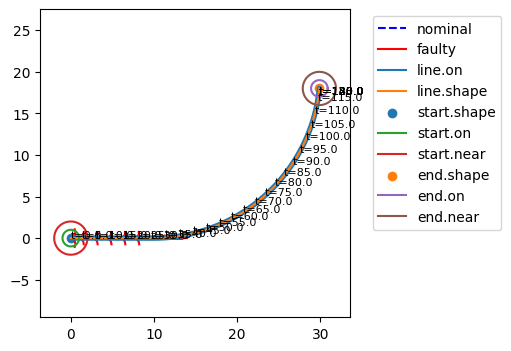

In [40]:
fig, ax = plot_map(mdl, hists)

In [41]:
fig.savefig("nocon_trajectories.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

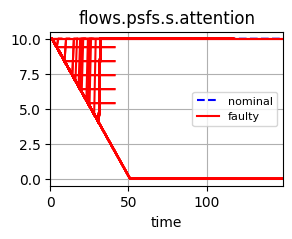

In [42]:
fig, ax = hists.plot_line('flows.psfs.s.attention')

In [43]:
fig.savefig("nocon_attention.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

In [44]:
mdl = RoverHuman(p={'ground': {'linetype': 'sine', 'amp': 2, 'period': 2/3.14*30}})

In [45]:
ers, hists = prop.fault_sample(mdl, fs)

SCENARIOS COMPLETE:   0%|          | 0/114 [00:00<?, ?it/s]

SCENARIOS COMPLETE:   1%|          | 1/114 [00:00<00:44,  2.52it/s]

SCENARIOS COMPLETE:   3%|▎         | 3/114 [00:00<00:17,  6.47it/s]

SCENARIOS COMPLETE:   4%|▍         | 5/114 [00:00<00:13,  7.98it/s]

SCENARIOS COMPLETE:   5%|▌         | 6/114 [00:00<00:13,  8.12it/s]

SCENARIOS COMPLETE:   6%|▌         | 7/114 [00:01<00:21,  5.08it/s]

SCENARIOS COMPLETE:   7%|▋         | 8/114 [00:01<00:23,  4.43it/s]

SCENARIOS COMPLETE:   8%|▊         | 9/114 [00:01<00:25,  4.04it/s]

SCENARIOS COMPLETE:   9%|▉         | 10/114 [00:02<00:27,  3.81it/s]

SCENARIOS COMPLETE:  10%|▉         | 11/114 [00:02<00:28,  3.66it/s]

SCENARIOS COMPLETE:  11%|█         | 12/114 [00:02<00:28,  3.56it/s]

SCENARIOS COMPLETE:  11%|█▏        | 13/114 [00:03<00:28,  3.50it/s]

SCENARIOS COMPLETE:  12%|█▏        | 14/114 [00:03<00:28,  3.45it/s]

SCENARIOS COMPLETE:  13%|█▎        | 15/114 [00:03<00:28,  3.42it/s]

SCENARIOS COMPLETE:  14%|█▍        | 16/114 [00:03<00:28,  3.39it/s]

SCENARIOS COMPLETE:  15%|█▍        | 17/114 [00:04<00:28,  3.38it/s]

SCENARIOS COMPLETE:  16%|█▌        | 18/114 [00:04<00:28,  3.37it/s]

SCENARIOS COMPLETE:  17%|█▋        | 19/114 [00:04<00:28,  3.35it/s]

SCENARIOS COMPLETE:  18%|█▊        | 20/114 [00:05<00:28,  3.34it/s]

SCENARIOS COMPLETE:  18%|█▊        | 21/114 [00:05<00:27,  3.34it/s]

SCENARIOS COMPLETE:  19%|█▉        | 22/114 [00:05<00:27,  3.34it/s]

SCENARIOS COMPLETE:  20%|██        | 23/114 [00:06<00:27,  3.35it/s]

SCENARIOS COMPLETE:  21%|██        | 24/114 [00:06<00:26,  3.35it/s]

SCENARIOS COMPLETE:  22%|██▏       | 25/114 [00:06<00:29,  3.01it/s]

SCENARIOS COMPLETE:  24%|██▎       | 27/114 [00:06<00:18,  4.73it/s]

SCENARIOS COMPLETE:  25%|██▌       | 29/114 [00:07<00:14,  5.99it/s]

SCENARIOS COMPLETE:  26%|██▋       | 30/114 [00:07<00:13,  6.39it/s]

SCENARIOS COMPLETE:  29%|██▉       | 33/114 [00:07<00:08,  9.67it/s]

SCENARIOS COMPLETE:  31%|███       | 35/114 [00:07<00:07, 10.44it/s]

SCENARIOS COMPLETE:  32%|███▏      | 37/114 [00:07<00:06, 11.43it/s]

SCENARIOS COMPLETE:  34%|███▍      | 39/114 [00:07<00:05, 12.96it/s]

SCENARIOS COMPLETE:  36%|███▌      | 41/114 [00:07<00:05, 12.98it/s]

SCENARIOS COMPLETE:  38%|███▊      | 43/114 [00:08<00:09,  7.35it/s]

SCENARIOS COMPLETE:  39%|███▉      | 45/114 [00:09<00:15,  4.36it/s]

SCENARIOS COMPLETE:  40%|████      | 46/114 [00:09<00:18,  3.75it/s]

SCENARIOS COMPLETE:  41%|████      | 47/114 [00:10<00:20,  3.31it/s]

SCENARIOS COMPLETE:  42%|████▏     | 48/114 [00:10<00:22,  3.00it/s]

SCENARIOS COMPLETE:  45%|████▍     | 51/114 [00:10<00:12,  5.14it/s]

SCENARIOS COMPLETE:  46%|████▋     | 53/114 [00:10<00:09,  6.34it/s]

SCENARIOS COMPLETE:  48%|████▊     | 55/114 [00:11<00:11,  5.20it/s]

SCENARIOS COMPLETE:  50%|█████     | 57/114 [00:11<00:08,  6.41it/s]

SCENARIOS COMPLETE:  52%|█████▏    | 59/114 [00:11<00:07,  7.16it/s]

SCENARIOS COMPLETE:  53%|█████▎    | 60/114 [00:11<00:07,  7.32it/s]

SCENARIOS COMPLETE:  54%|█████▎    | 61/114 [00:12<00:10,  5.01it/s]

SCENARIOS COMPLETE:  55%|█████▌    | 63/114 [00:12<00:07,  6.53it/s]

SCENARIOS COMPLETE:  57%|█████▋    | 65/114 [00:12<00:06,  7.39it/s]

SCENARIOS COMPLETE:  58%|█████▊    | 66/114 [00:12<00:06,  7.51it/s]

SCENARIOS COMPLETE:  59%|█████▉    | 67/114 [00:13<00:09,  4.86it/s]

SCENARIOS COMPLETE:  61%|██████    | 69/114 [00:13<00:07,  6.40it/s]

SCENARIOS COMPLETE:  62%|██████▏   | 71/114 [00:13<00:05,  7.23it/s]

SCENARIOS COMPLETE:  63%|██████▎   | 72/114 [00:13<00:05,  7.40it/s]

SCENARIOS COMPLETE:  64%|██████▍   | 73/114 [00:14<00:08,  4.93it/s]

SCENARIOS COMPLETE:  66%|██████▌   | 75/114 [00:14<00:05,  6.58it/s]

SCENARIOS COMPLETE:  68%|██████▊   | 77/114 [00:14<00:04,  7.48it/s]

SCENARIOS COMPLETE:  68%|██████▊   | 78/114 [00:14<00:04,  7.61it/s]

SCENARIOS COMPLETE:  69%|██████▉   | 79/114 [00:15<00:07,  4.99it/s]

SCENARIOS COMPLETE:  71%|███████   | 81/114 [00:15<00:04,  6.63it/s]

SCENARIOS COMPLETE:  73%|███████▎  | 83/114 [00:15<00:04,  7.51it/s]

SCENARIOS COMPLETE:  74%|███████▎  | 84/114 [00:15<00:03,  7.58it/s]

SCENARIOS COMPLETE:  75%|███████▍  | 85/114 [00:16<00:05,  4.99it/s]

SCENARIOS COMPLETE:  76%|███████▋  | 87/114 [00:16<00:04,  6.63it/s]

SCENARIOS COMPLETE:  78%|███████▊  | 89/114 [00:16<00:03,  7.46it/s]

SCENARIOS COMPLETE:  79%|███████▉  | 90/114 [00:16<00:03,  7.51it/s]

SCENARIOS COMPLETE:  80%|███████▉  | 91/114 [00:17<00:04,  4.92it/s]

SCENARIOS COMPLETE:  82%|████████▏ | 93/114 [00:17<00:03,  6.57it/s]

SCENARIOS COMPLETE:  83%|████████▎ | 95/114 [00:17<00:02,  7.43it/s]

SCENARIOS COMPLETE:  84%|████████▍ | 96/114 [00:17<00:02,  7.58it/s]

SCENARIOS COMPLETE:  85%|████████▌ | 97/114 [00:17<00:02,  5.83it/s]

SCENARIOS COMPLETE:  86%|████████▌ | 98/114 [00:18<00:03,  4.90it/s]

SCENARIOS COMPLETE:  87%|████████▋ | 99/114 [00:18<00:03,  4.32it/s]

SCENARIOS COMPLETE:  88%|████████▊ | 100/114 [00:18<00:03,  3.93it/s]

SCENARIOS COMPLETE:  89%|████████▊ | 101/114 [00:19<00:03,  3.73it/s]

SCENARIOS COMPLETE:  89%|████████▉ | 102/114 [00:19<00:03,  3.57it/s]

SCENARIOS COMPLETE:  90%|█████████ | 103/114 [00:19<00:03,  3.49it/s]

SCENARIOS COMPLETE:  91%|█████████ | 104/114 [00:19<00:02,  3.42it/s]

SCENARIOS COMPLETE:  92%|█████████▏| 105/114 [00:20<00:02,  3.39it/s]

SCENARIOS COMPLETE:  93%|█████████▎| 106/114 [00:20<00:02,  3.33it/s]

SCENARIOS COMPLETE:  94%|█████████▍| 107/114 [00:20<00:02,  3.30it/s]

SCENARIOS COMPLETE:  95%|█████████▍| 108/114 [00:21<00:01,  3.25it/s]

SCENARIOS COMPLETE:  96%|█████████▌| 109/114 [00:21<00:01,  3.24it/s]

SCENARIOS COMPLETE:  96%|█████████▋| 110/114 [00:21<00:01,  3.19it/s]

SCENARIOS COMPLETE:  97%|█████████▋| 111/114 [00:22<00:00,  3.12it/s]

SCENARIOS COMPLETE:  98%|█████████▊| 112/114 [00:22<00:00,  3.15it/s]

SCENARIOS COMPLETE:  99%|█████████▉| 113/114 [00:22<00:00,  3.17it/s]

SCENARIOS COMPLETE: 100%|██████████| 114/114 [00:23<00:00,  3.20it/s]

SCENARIOS COMPLETE: 100%|██████████| 114/114 [00:23<00:00,  4.93it/s]

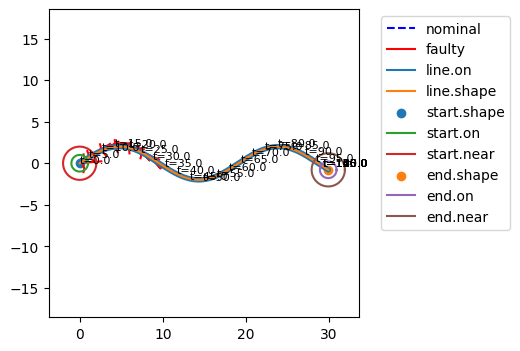

In [46]:
fig, ax = plot_map(mdl, hists)

In [47]:
fig.savefig("nocon_trajectories_sine.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)

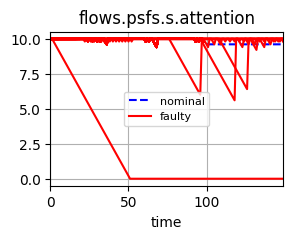

In [48]:
fig, ax = hists.plot_line('flows.psfs.s.attention')

In [49]:
fig.savefig("nocon_attention_sine.pdf", format="pdf", bbox_inches = 'tight', pad_inches = 0)